# Importing Libraries

In [85]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap
%matplotlib inline
import statsmodels.formula.api as smf # statsmodels.formula.api importing

# Reading/Importing Data File

In [66]:
df = pd.read_csv('Chapter 3 Project_Bank_Data_BankNoteDataSet.csv',names=('variance','skewness','curtosis','entropy','class'))
X = df[['variance','curtosis',]]
y = df['class']
#X
#y
#df.head(1)
#df.tail(1)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)  

In [87]:
yVariable=df['class']     # Selecting our response variable
x1Variable=df['variance'] # Selecting our predictor variables
x2Variable=df['skewness'] # Selecting our predictor variables
x3Variable=df['curtosis'] # Selecting our predictor variables
x4Variable=df['entropy']  # Selecting our predictor variables
              
My_vars= df.iloc[:,0:4]
correl=My_vars.corr()
print(correl)

          variance  skewness  curtosis   entropy
variance  1.000000  0.264026 -0.380850  0.276817
skewness  0.264026  1.000000 -0.786895 -0.526321
curtosis -0.380850 -0.786895  1.000000  0.318841
entropy   0.276817 -0.526321  0.318841  1.000000


In [67]:
from sklearn.linear_model import Perceptron 
ppn = Perceptron(n_iter=50, eta0=0.1, random_state=1) 
ppn.fit(X_train_std, y_train)
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
y_pred = ppn.predict(X_test_std) 
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score 
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred)) 

Misclassified samples: 66
Accuracy: 0.84


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [48]:
!pip install mlxtend ## Adding mlxtend Package to Python

  Using cached https://files.pythonhosted.org/packages/16/e6/30e50ed9c053a1530c83149090e1f5fd9fccc8503dca2ecce1bb52f34de0/mlxtend-0.15.0.0-py2.py3-none-any.whl


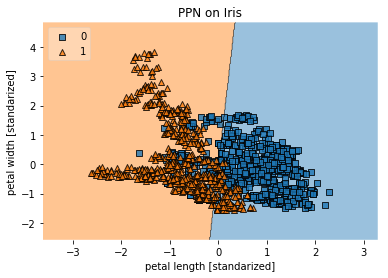

In [68]:
from mlxtend.plotting import plot_decision_regions
X_combined_std = np.vstack((X_train_std, X_test_std)) 
y_combined = np.hstack((y_train, y_test)) 

plot_decision_regions(X_combined_std, y_combined, clf=ppn, legend=2)
plt.xlabel('variance [standarized]')
plt.ylabel('curtosis [standarized]')
plt.title('PPN on Iris')
plt.show()

In [88]:
## Extract model accuracy and misclassification errors
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('\nAccuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 66

Accuracy: 0.84


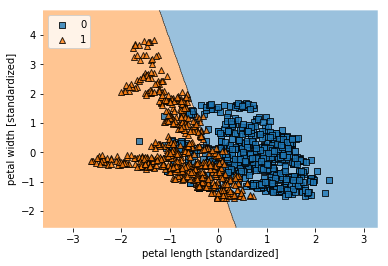

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, clf=lr)
plt.xlabel('variance [standarized]')
plt.ylabel('curtosis [standarized]')
plt.legend(loc='upper left')
plt.show()

In [89]:
## Extract model accuracy and misclassification errors
y_pred = lr.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('\nAccuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 55

Accuracy: 0.87


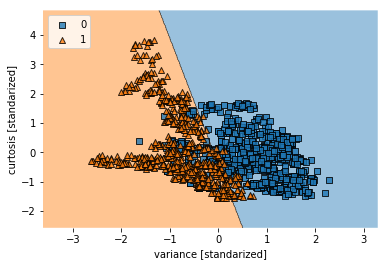

In [92]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, clf=svm)
plt.xlabel('variance [standarized]')
plt.ylabel('curtosis [standarized]')
plt.legend(loc='upper left')
plt.show()

In [93]:
## Extract model accuracy and misclassification errors
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('\nAccuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 48

Accuracy: 0.88


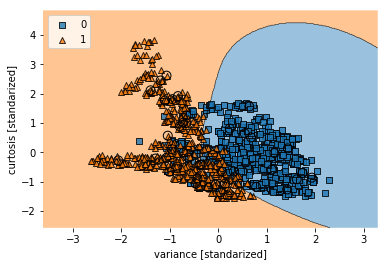

In [94]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
#X_test, y_test = X_train_std.arange(105,150), y_train_std.arange(105,150)
plot_decision_regions(X_combined_std,y_combined, clf=svm,X_highlight=X_combined_std[105:150])
plt.xlabel('variance [standarized]')
plt.ylabel('curtosis [standarized]')
plt.legend(loc='upper left')
plt.show()

In [95]:
## Extract model accuracy and misclassification errors
y_pred = svm.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('\nAccuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 44

Accuracy: 0.89


No handles with labels found to put in legend.


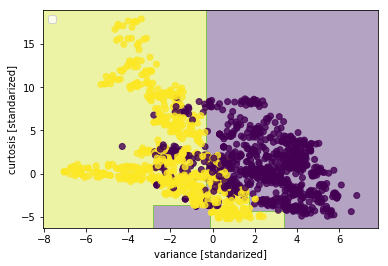

In [75]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=1)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

##------------------------------------------------------------------------------------------------------
##------------------------------------------------------------------------------------------------------
## plot_decision_regions2 needed because mlexnt doesnt provide support for decision tree classifier
def plot_decision_regions2(X, y, clf, res=0.02):
    """
    Plots decision regions of a classifier.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
      Feature Matrix.
      
    y : array-like, shape = [n_samples]
      True class labels.
    
    clf : Classifier object. Must have a .predict method.
        
    res : float (default: 0.02)
      Grid width. Lower values increase the resolution but
        slow down the plotting.
        
    Returns
    ---------
    None

    """
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, res),
                         np.arange(y_min, y_max, res))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y,  alpha=0.8)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
##------------------------------------------------------------------------------------------------------
##------------------------------------------------------------------------------------------------------
##------------------------------------------------------------------------------------------------------


plot_decision_regions2(X_combined,y_combined,clf=tree)
#plot_decision_regions(X_combined_std,y_combined, clf=tree,X_highlight=X_combined_std[105:150])
plt.xlabel('variance [standarized]')
plt.ylabel('curtosis [standarized]')
plt.legend(loc='upper left')
plt.show()

In [96]:
## Extract model accuracy and misclassification errors
y_pred = tree.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('\nAccuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 67

Accuracy: 0.84


In [ ]:
#!pip install graphviz  ## Required sometimes before pydotplus
#!pip install pyparsing ## Required sometimes before pydotplus
!pip install pydotplus

In [76]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree,filled=True,rounded=True,class_names=['Setosa','Versicolor','Virginica'],feature_names=['petal length','petal width'],out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

ImportError: No module named 'pydotplus'

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


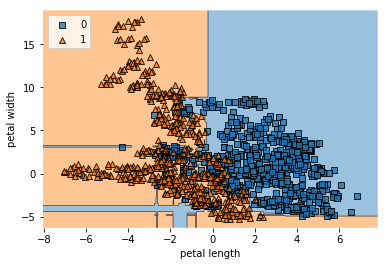

In [77]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',n_estimators=25,random_state=1,n_jobs=2)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,clf=forest)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

In [97]:
## Extract model accuracy and misclassification errors
y_pred = forest.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('\nAccuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 85

Accuracy: 0.79


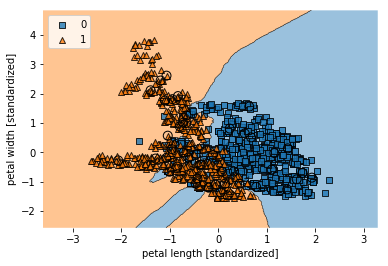

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2,metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,clf=knn, X_highlight=X_combined_std[105:150])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [98]:
## Extract model accuracy and misclassification errors
y_pred = knn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
from sklearn.metrics import accuracy_score
print('\nAccuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 40

Accuracy: 0.90
